In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*#Replacing blanks with 0 as tenures is 0 and no total charges are recorded.*

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.describe ()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

np.int64(0)

In [10]:
def convert(value):
  if str(value) == "1" :
    return "yes"
  else:
    return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(convert)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


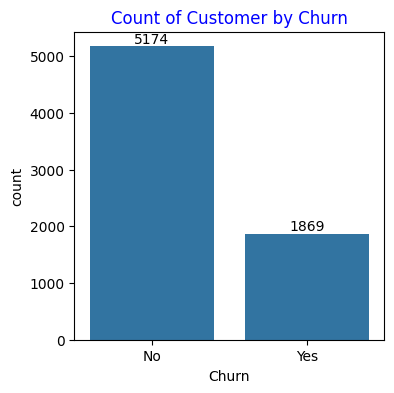

In [11]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = df['Churn'])
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn", color = "blue")
plt.show()

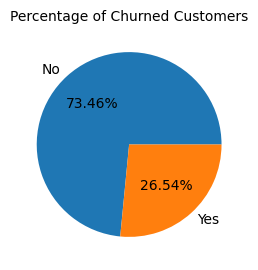

In [12]:
plt.figure(figsize = (3,3))
gb = df.groupby("Churn").agg({'Churn':"count"})
gb
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

*#From the given pie chart we can conclude that 26.54% of our customers have churned out.*

*#Now let's explore the reason behind it.*

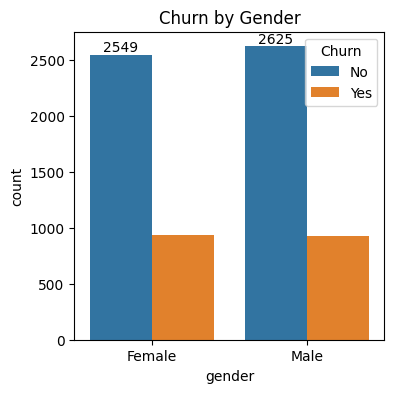

In [13]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "gender", data = df, hue = "Churn" )
ax.bar_label(ax.containers[0])
plt.title("Churn by Gender")
plt.show()

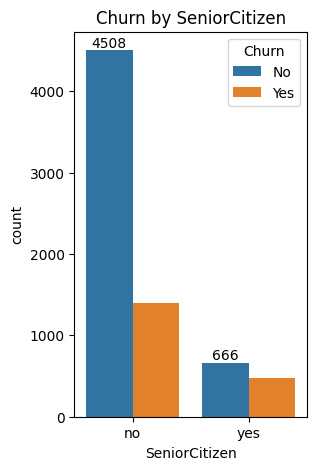

In [24]:
plt.figure(figsize = (3,5))
ax = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn" )
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

<Figure size 400x400 with 0 Axes>

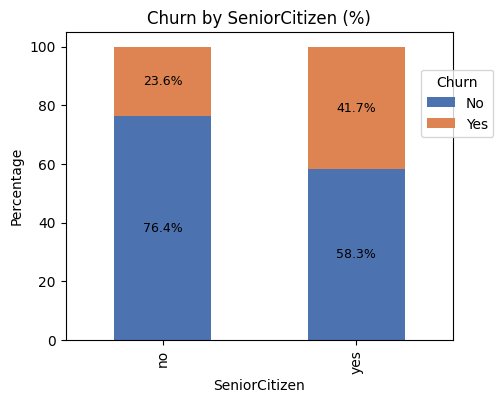

In [15]:
plt.figure(figsize =(4,4))
data = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
colors = sns.color_palette("deep")[0:2]
# Step 2: Plot as stacked bar chart
data.plot(
    kind='bar',
    stacked=True,
    figsize=(5,4),
    color = colors
)

# Step 3: Add percentage labels on each bar
for i, (index, row) in enumerate(data.iterrows()):
    cumulative = 0
    for col in data.columns:
        value = row[col]
        plt.text(
            i,
            cumulative + (value / 2),
            f'{value:.1f}%',
            ha='center',
            va='center',
            fontsize=9,
            color='black'
        )
        cumulative += value

# Step 4: Add labels and title
plt.title("Churn by SeniorCitizen (%)", fontsize=12)
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn", bbox_to_anchor = (.9,.9))
plt.show()

*#Comparatively a greater percentage of people in senior citizen category have churned*

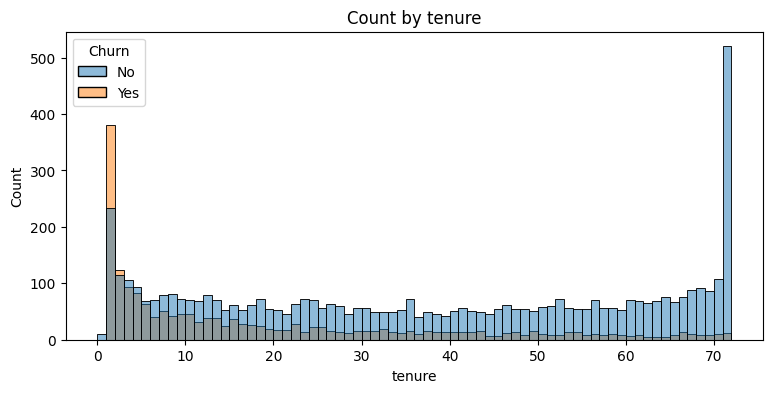

In [16]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.title("Count by tenure")
plt.show()

***#People who have used our services for a long time stayed and people who have used our services for a one or two month are Churned.***

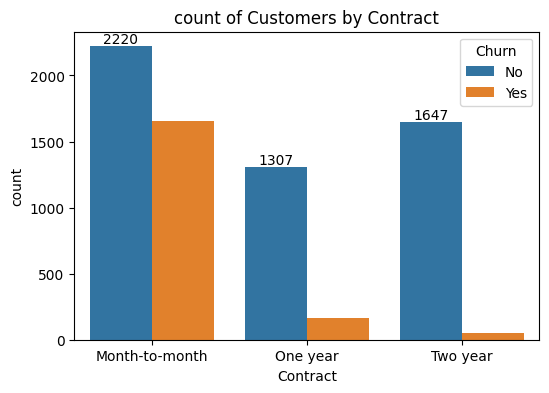

In [17]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of Customers by Contract")
plt.show()

*#People who have month-to-month contract are likely to churn then from those who have  one or two years are contract.*

In [18]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

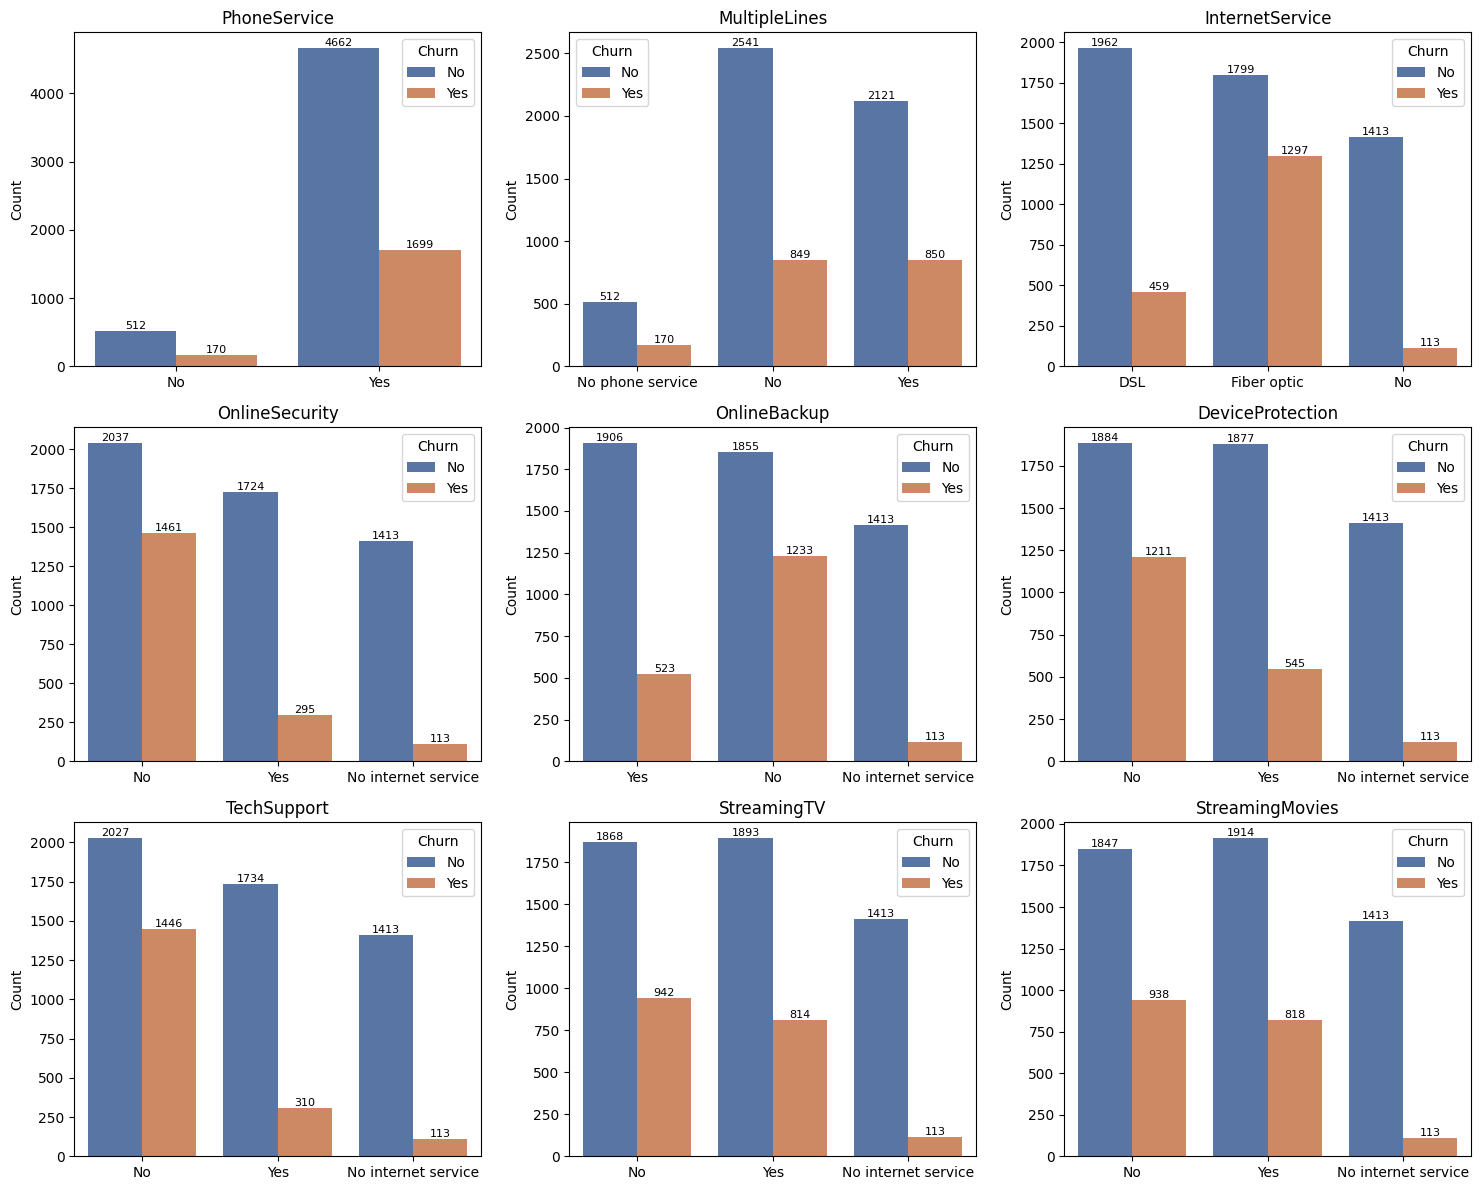

In [19]:

# List of categorical columns you want to plot
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the grid size (3 rows × 3 columns for 9 plots)
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # ensures all plots fit

plt.figure(figsize=(15, 12))  # adjust size as needed

# Loop through columns and create subplots
for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(
        data=df,
        x=col,
        hue='Churn',
        palette='deep'
    )

    # Add labels above bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


*Customers using Fiber optic internet exhibit the highest churn rate, while those with DSL or no internet service are more stable.
Lack of OnlineSecurity, TechSupport, and other add-on services strongly correlates with higher churn.*
*Customers with multiple value-added services tend to stay longer.
Overall, enhancing support and security features can significantly reduce churn.*

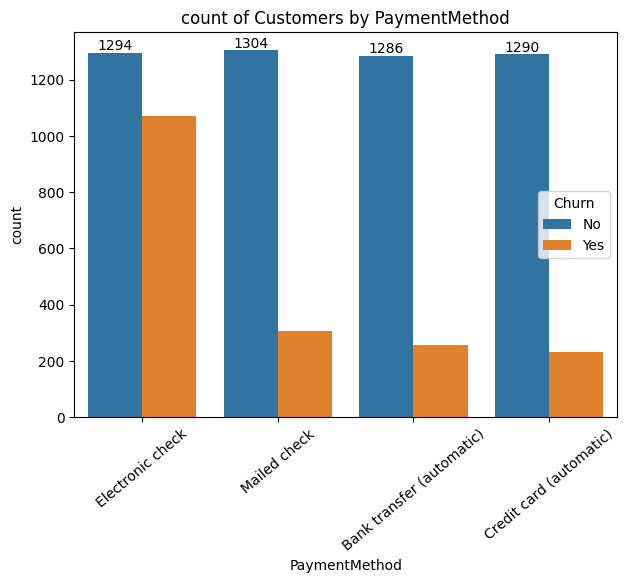

In [27]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of Customers by PaymentMethod")
plt.xticks(rotation = 40)
plt.show()

## ***#customer is likely to churn when he is using electronic check as a payment method***